In [1]:
pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.5 MB/s eta 0:00:00


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS  # enables direct queries to the SDSS database
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [184]:
GALquery = """SELECT TOP 10000 
             p.dered_u - p.dered_g as ug, p.dered_g - p.dered_r as gr, 
             p.dered_g - p.dered_i as gi, p.dered_g - p.dered_z as gz,             
             p.petroRad_i, p.petroR50_i, p.deVAB_i
             FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
             WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND p.type = 3
               """
SDSSgals = SDSS.query_sql(GALquery)
SDSSgals

ug,gr,gi,gz,petroRad_i,petroR50_i,deVAB_i
float64,float64,float64,float64,float64,float64,float64
3.088814,1.696928,2.634346,3.159641,2.601493,1.305033,0.5505874
0.9645214,1.619699,2.642914,3.184414,2.154913,0.9722465,0.9991189
1.987982,1.862652,2.686975,3.079304,2.621456,1.161441,0.7169368
4.55904,1.536175,2.29286,2.712597,4.741546,2.09032,0.5173162
2.173548,1.656412,2.443594,2.705187,3.30895,1.534084,0.5050434
0.1763363,2.02594,3.190075,3.782854,2.930384,1.497743,0.3863332
2.2999,1.541431,2.100828,2.45454,4.668763,2.061947,0.7504196
1.730419,0.8698006,1.256016,1.569517,4.688128,1.961388,0.9905503
3.605389,1.74404,2.354504,2.737415,8.147226,1.023063,0.9065979


In [185]:
SDSSgals['ug']

3.088814
0.9645214
1.987982
4.55904
2.173548
0.1763363
2.2999
1.730419
3.605389
1.288181
1.647102


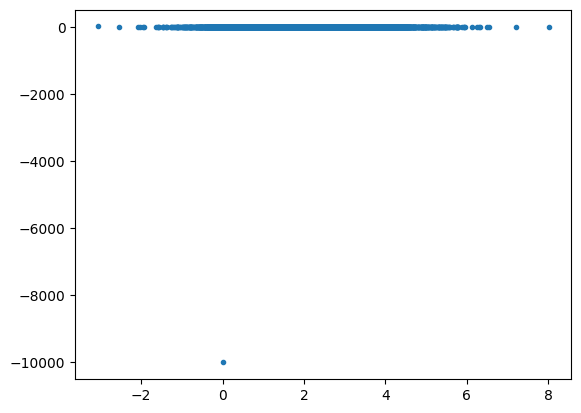

In [186]:
plt.figure()
plt.scatter(SDSSgals['ug'], SDSSgals['gr'], marker='.')
plt.show()

In [47]:
outlier = np.where(SDSSgals['gr']<-8000)

In [48]:
outlier

(array([960]),)

In [49]:
SDSSgals[1852]

ug,gr,gi,gz,petroRad_i,petroR50_i,deVAB_i
float64,float64,float64,float64,float64,float64,float64
0.7634106,1.27458,1.850172,2.146986,1.955884,0.9368685,0.7630175


In [187]:
df = SDSSgals.to_pandas()
df

,ug,gr,gi,gz,petroRad_i,petroR50_i,deVAB_i
0,3.088814,1.696928,2.634346,3.159641,2.601493,1.305033,0.550587
1,0.964521,1.619699,2.642914,3.184414,2.154913,0.972247,0.999119
2,1.987982,1.862652,2.686975,3.079304,2.621456,1.161441,0.716937
3,4.559040,1.536175,2.292860,2.712597,4.741546,2.090320,0.517316
4,2.173548,1.656412,2.443594,2.705187,3.308950,1.534084,0.505043
...,...,...,...,...,...,...,...
9995,0.749678,1.356607,2.581303,3.272669,2.244534,1.053639,0.557608
9996,0.810976,2.227640,3.309988,3.694845,2.203654,1.025457,0.443045
9997,0.753271,0.832043,1.511082,1.776556,3.558664,1.702769,0.759102
9998,3.811081,1.481010,2.539179,3.148806,2.129471,1.002469,0.999828


In [51]:
df = df.drop(1852)

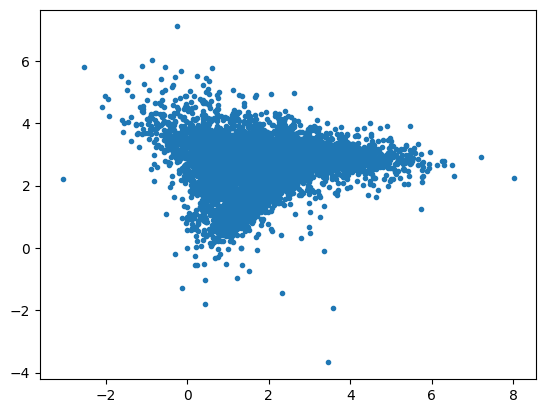

In [52]:
plt.figure()
plt.scatter(df['ug'], df['gz'], marker='.')
plt.show()

In [53]:
X = np.array(df)
X.shape

(9999, 7)

In [54]:

gscaler = StandardScaler().fit(X)

X_train = gscaler.transform(X)

In [169]:
dbs = DBSCAN(eps= 0.5, min_samples=110)

In [170]:
dbs

DBSCAN(min_samples=110)

In [171]:
dbs.fit(X_train)

DBSCAN(min_samples=110)

In [172]:
dbs.labels_

array([ 0,  0,  0, ...,  0, -1, -1])

In [173]:
cluster_members = dbs.labels_ != -1

In [174]:
cluster_members

array([ True,  True,  True, ...,  True, False, False])

In [175]:
outliers = dbs.labels_ == -1
outliers

array([False, False, False, ..., False,  True,  True])

In [176]:
X[:,0]

array([ 3.088814 ,  0.9645214,  1.987982 , ...,  0.7532711,  3.811081 ,
       -0.5770111])

In [177]:
X_train[:,0]

array([ 1.27376418, -0.75174587,  0.22412239, ..., -0.95317274,
        1.96244476, -2.22159497])

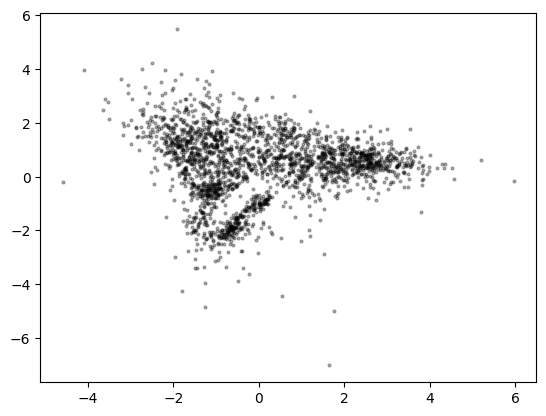

In [178]:
plt.figure()
plt.scatter(X_train[:,0][outliers], X_train[:,3][outliers],
           c = 'k',
           s = 4, alpha=0.3)

plt.show()

In [179]:
len(dbs.labels_[cluster_members])

7732

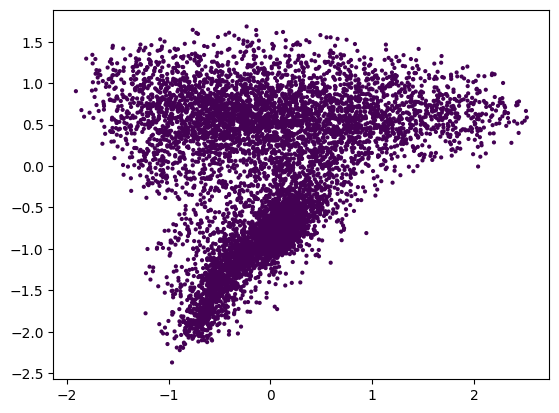

In [180]:
plt.figure()
plt.scatter(X_train[:,0][cluster_members], X_train[:,3][cluster_members], 
           c = dbs.labels_[cluster_members], 
            s = 4 ,alpha = 1, cmap = "viridis")
plt.show()

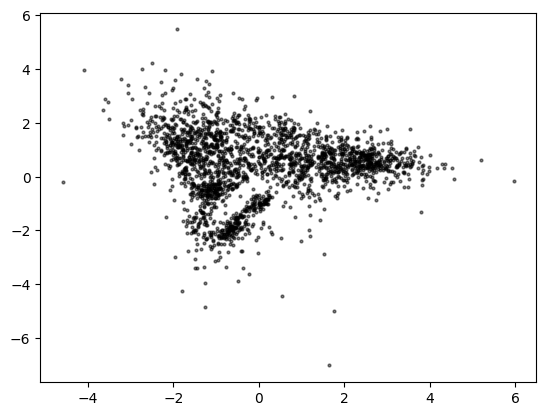

In [181]:
plt.figure()
plt.scatter(X_train[:,0][outliers], X_train[:,3][outliers],
           c = 'k',
           s = 4, alpha=0.5)

plt.show()

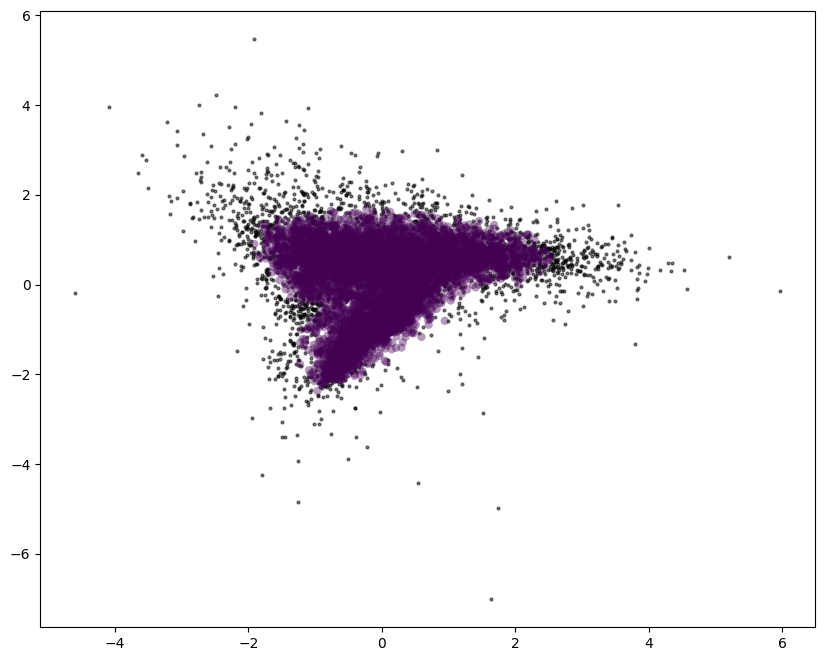

In [182]:
plt.figure(figsize = (10,8))
plt.scatter(X_train[:,0][outliers], X_train[:,3][outliers],
           c = 'k',
           s = 4, alpha=0.5)
plt.scatter(X_train[:,0][cluster_members], X_train[:,3][cluster_members], 
            c = dbs.labels_[cluster_members], 
            alpha = 0.4, edgecolor = "None", cmap = "viridis")
plt.show()